약정에 의하여 이용권을 획득한 특정 회원을 대상으로 제공되는 숙박시설로서 여유 객실은 일반인을 대상으로 제공하기도 한다. 스키장이나 골프장 등의 레저시설을 함께 운영하는 경우도 포함한다.  

<예시>
·회원제 숙박시설(취사시설을 갖춘) 운영  
·회원용 콘도미니엄 운영  
·특정 단체 전용 휴양·숙박시설 운영  
·가족호텔  

<제외>  
·각종 휴양, 오락, 여가시설을 주로 운영하면서 숙박시설을 함께 운영하는 경우, 해당되는 휴양, 오락, 여가 산업활동으로 분류  

In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [3]:
data = pd.read_csv("업종별/휴양콘도 운영업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114921 entries, 0 to 114920
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      114921 non-null  object
 1   CARD_SIDO_NM  114921 non-null  object
 2   CARD_CCG_NM   114921 non-null  object
 3   STD_CLSS_NM   114921 non-null  object
 4   HOM_SIDO_NM   114921 non-null  object
 5   HOM_CCG_NM    113838 non-null  object
 6   AGE           114921 non-null  object
 7   SEX_CTGO_CD   114921 non-null  int64 
 8   FLC           114921 non-null  int64 
 9   CSTMR_CNT     114921 non-null  int64 
 10  AMT           114921 non-null  int64 
 11  CNT           114921 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 11.4+ MB
None


In [5]:
#안쓰는 컬럼 드랍, 정제
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [6]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114921 entries, 0 to 114920
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      114921 non-null  object
 1   CARD_SIDO_NM  114921 non-null  object
 2   HOM_SIDO_NM   114921 non-null  object
 3   AGE           114921 non-null  object
 4   SEX_CTGO_CD   114921 non-null  int64 
 5   FLC           114921 non-null  int64 
 6   CSTMR_CNT     114921 non-null  int64 
 7   AMT           114921 non-null  int64 
 8   CNT           114921 non-null  int64 
 9   year          114921 non-null  int64 
 10  month         114921 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 10.5+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  20s            1    1          5   
1   201901           강원          강원  20s            2    1          8   
2   201901           강원          강원  30s            1  

In [7]:
print(df.CARD_SIDO_NM.unique())#10개
print(df.HOM_SIDO_NM.unique())

['강원' '경기' '경남' '경북' '부산' '전남' '전북' '제주' '충남' '충북']
['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '충남' '충북' '제주']


CARD_SIDO_NM
충북     2414736980
경기     2468254593
충남     3967138248
전남     4192316889
경북     4835149377
부산     5237963025
전북     6346178051
경남     7085369468
제주     7475474469
강원    35859278406
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

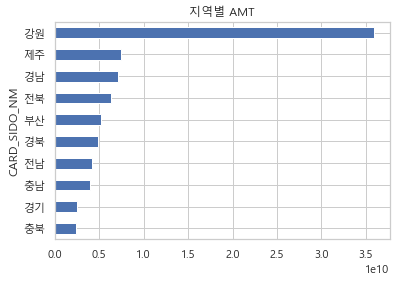

In [8]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901     8224321688
201902     6104431321
201903     3378598195
201904     2854341346
201905     4357229972
201906     4185033466
201907     7140818167
201908    13121845211
201909     3764060856
201910     4838868236
201911     3333090812
201912     5293795864
202001     8873863619
202002     3317926290
202003     1093634463
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

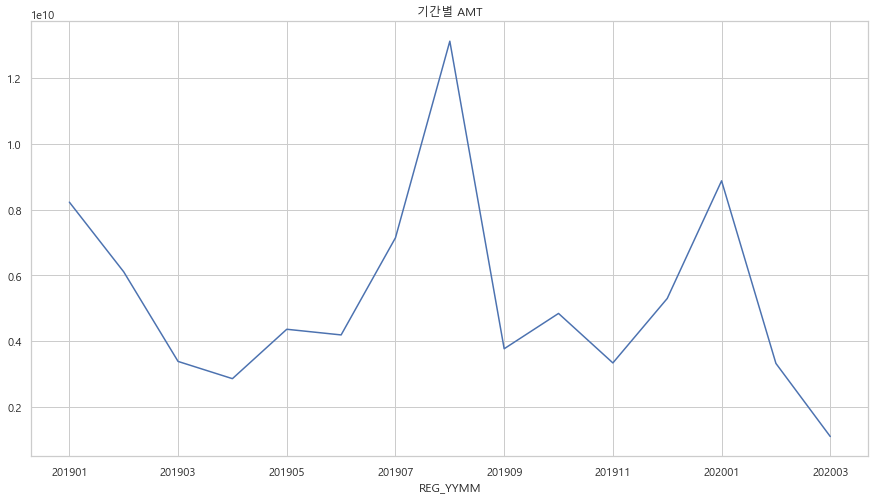

In [9]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

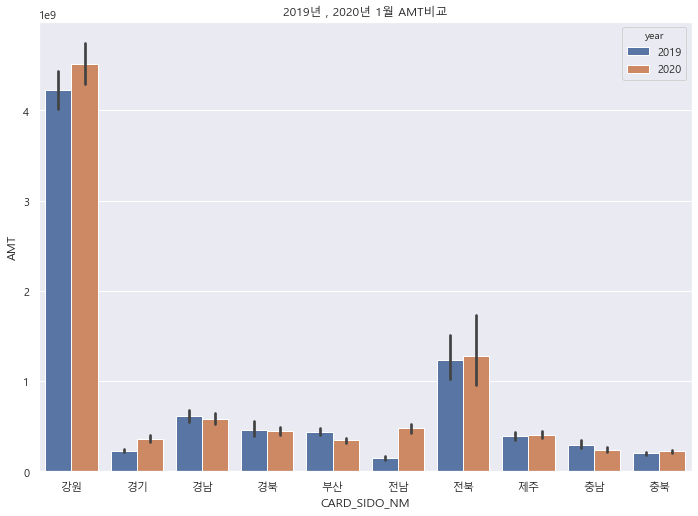

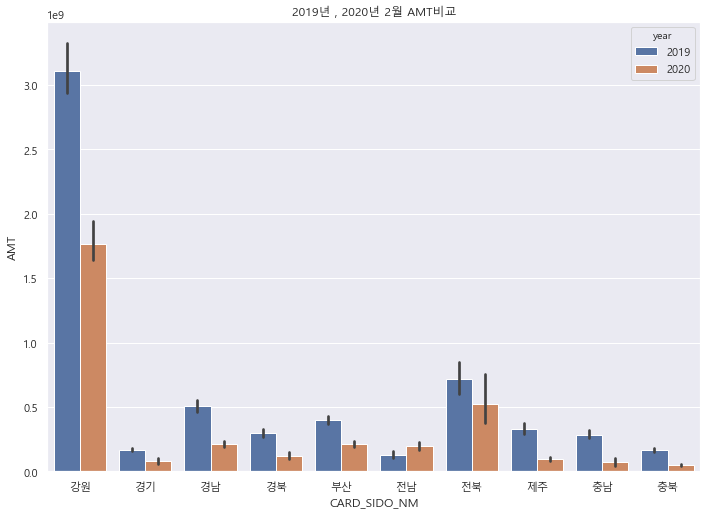

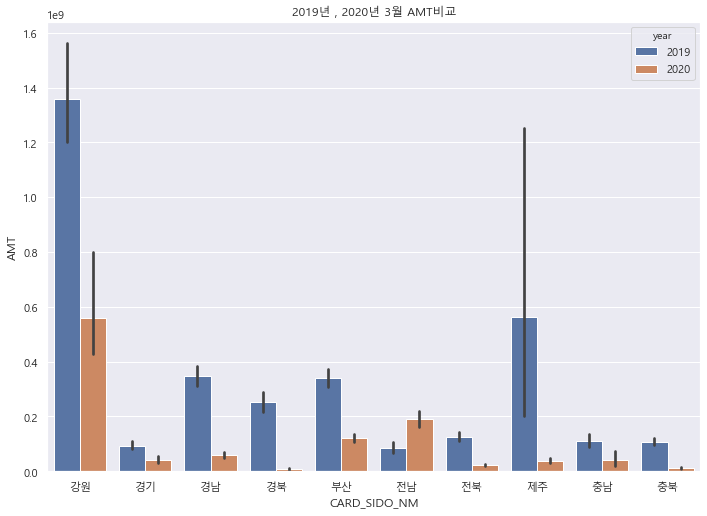

In [10]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

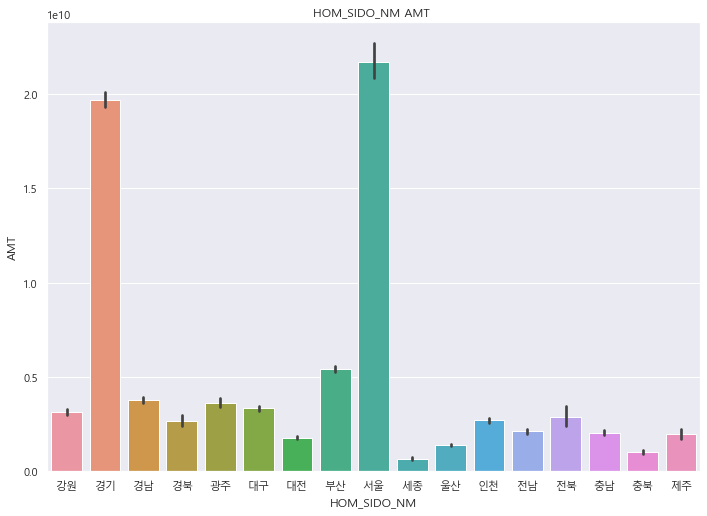

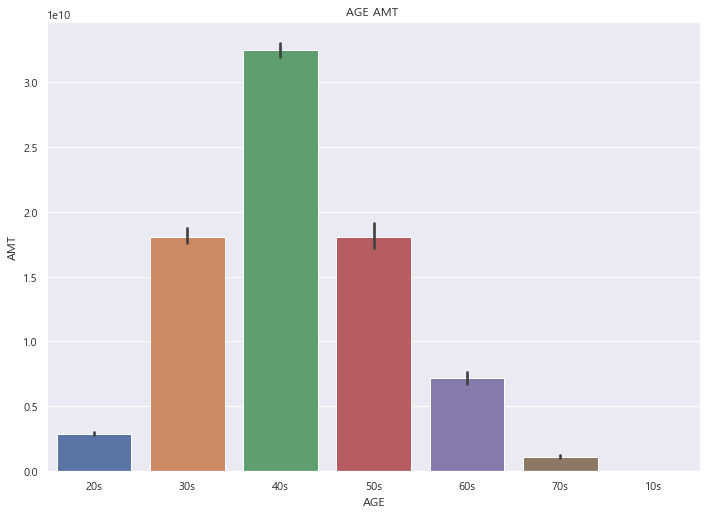

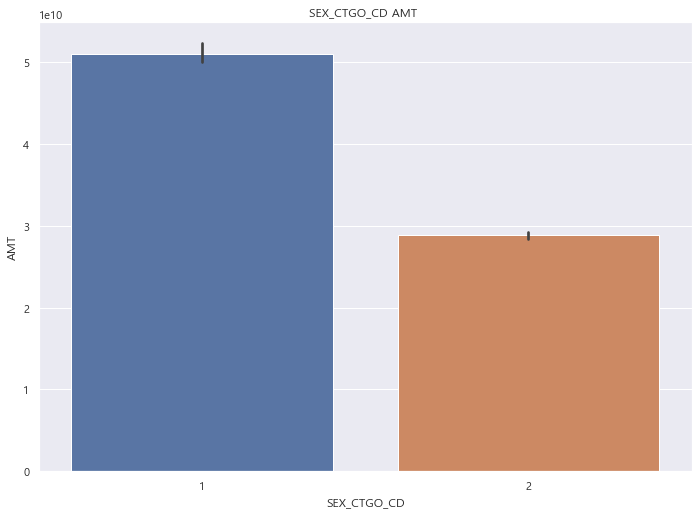

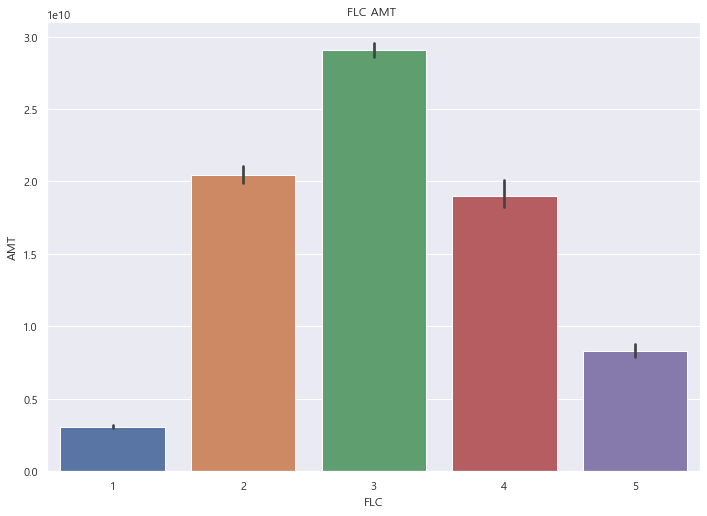

In [11]:
cols = ['HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()